# Analysis and Prediction-Indian Liver Patients.

The dataset was downloaded from the UCI ML Repository.

Here are the steps I'm going to perform:  
1) Data Analysis: This is in general looking at the data to figure out whats going on. Inspect the data: Check whether there is any missing data, irrelevant data and do a cleanup.  
2) Data Visualization:   
3) Feature selection.  
4) Search for any trends, relations & correlations.  
5) Draw an inference and predict whether the patient can be identified to be having liver disease or not  

In [185]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WyoyfW8i5wE2C3n_DYo8GvF9wNvkPcXpMiD-mOzvFJME',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'statisticalmachinelearningapproac-donotdelete-pr-j7obivizehrqje'
object_key = 'indian_liver_patient.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [186]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Data Analysis

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). 

In [187]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:   
1) Only gender is non-numeric veriable. All others are numeric.   
2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.  

In [189]:
#Describe gives statistical information about NUMERICAL columns in the dataset
df.describe(include='all')
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
#Gender has only 2 values - Male/Female

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [190]:
#Which features are available in the dataset?
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [191]:
#Check for any null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null. Lets see whether this is an important feature    

# Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


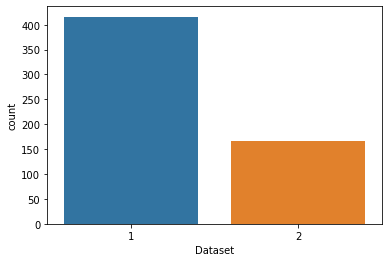

In [192]:
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


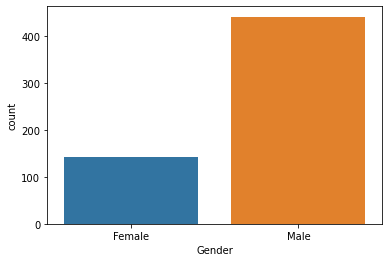

In [193]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

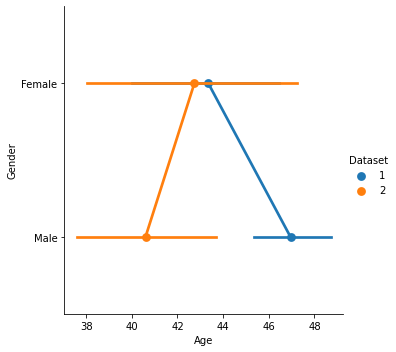

In [194]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=df);

Age seems to be a factor for liver disease for both male and female genders

In [195]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [196]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


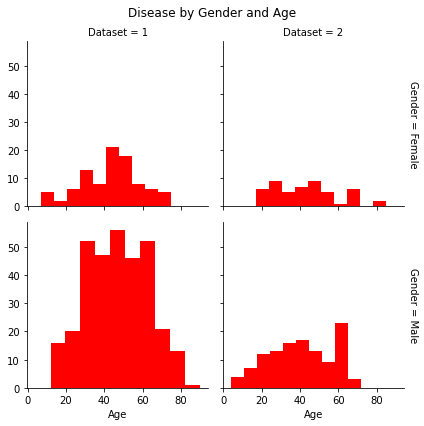

In [197]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

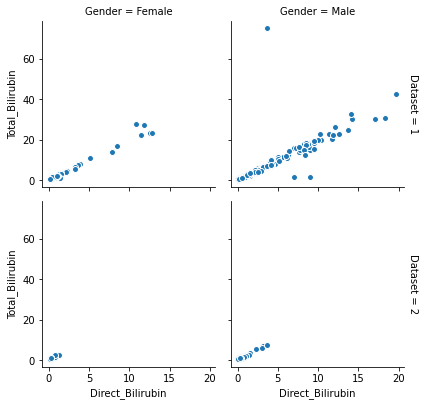

In [198]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

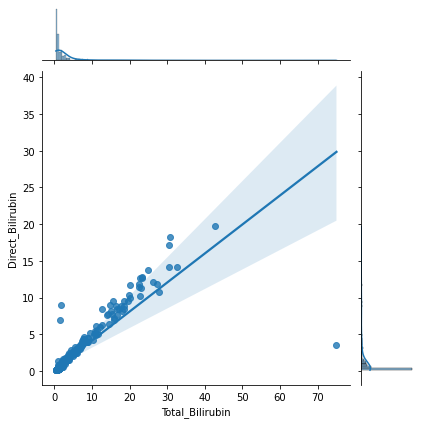

In [199]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=df, kind="reg")

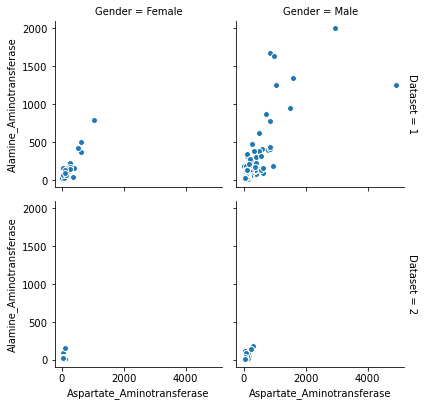

In [200]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

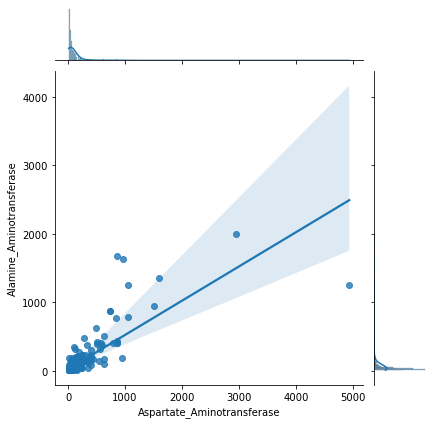

In [201]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")

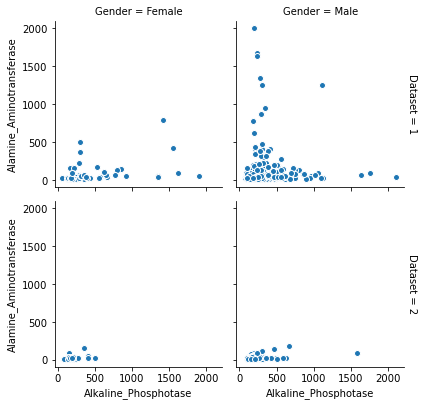

In [202]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

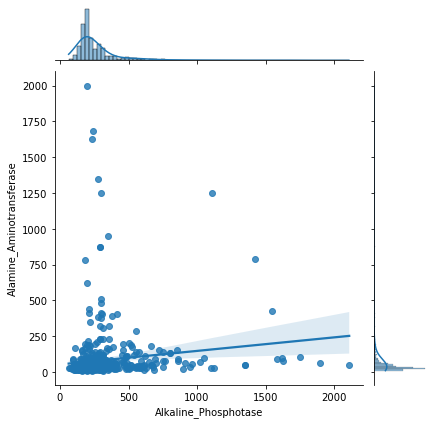

In [203]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=df, kind="reg")

No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

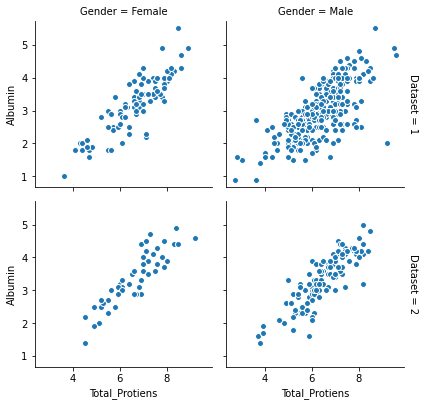

In [204]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

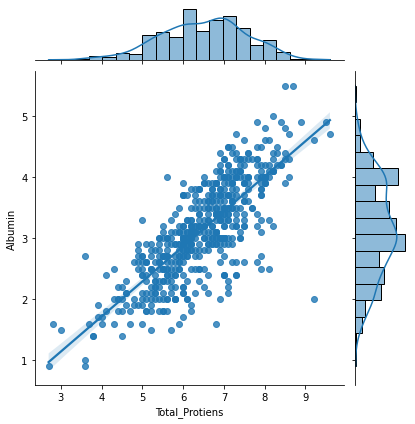

In [205]:
sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

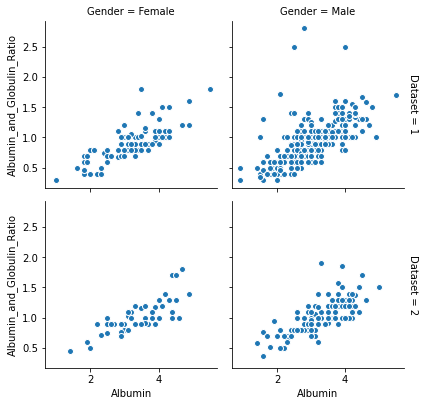

In [206]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

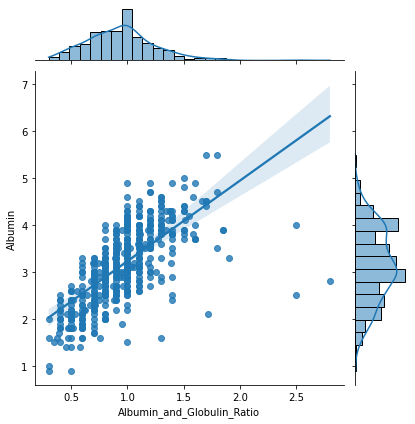

In [207]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=df, kind="reg")

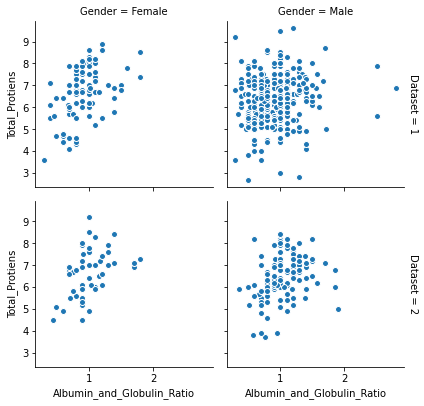

In [208]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

# Observation:

From the above jointplots and scatterplots, we find direct relationship between the following features:  
Direct_Bilirubin & Total_Bilirubin  
Aspartate_Aminotransferase & Alamine_Aminotransferase  
Total_Protiens & Albumin  
Albumin_and_Globulin_Ratio & Albumin  

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:  
Total_Bilirubin  
Alamine_Aminotransferase  
Total_Protiens  
Albumin_and_Globulin_Ratio  
Albumin  

In [209]:
df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


Convert categorical variable "Gender" to indicator variables

In [210]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [211]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [212]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [213]:
df["Albumin_and_Globulin_Ratio"] =df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [214]:
#liver_df[liver_df['Albumin_and_Globulin_Ratio'] == 0.9470639032815201]

In [225]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
# gender contains string values Male, Female; these will be converted into 0, 1, as ML algorithms like just numerical values
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.Gender.head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [226]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = df.drop(['Dataset'], axis=1)
X.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89


In [227]:
X.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [228]:
y = df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [229]:
# Correlation
liver_corr = X.corr()

In [230]:
liver_corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000


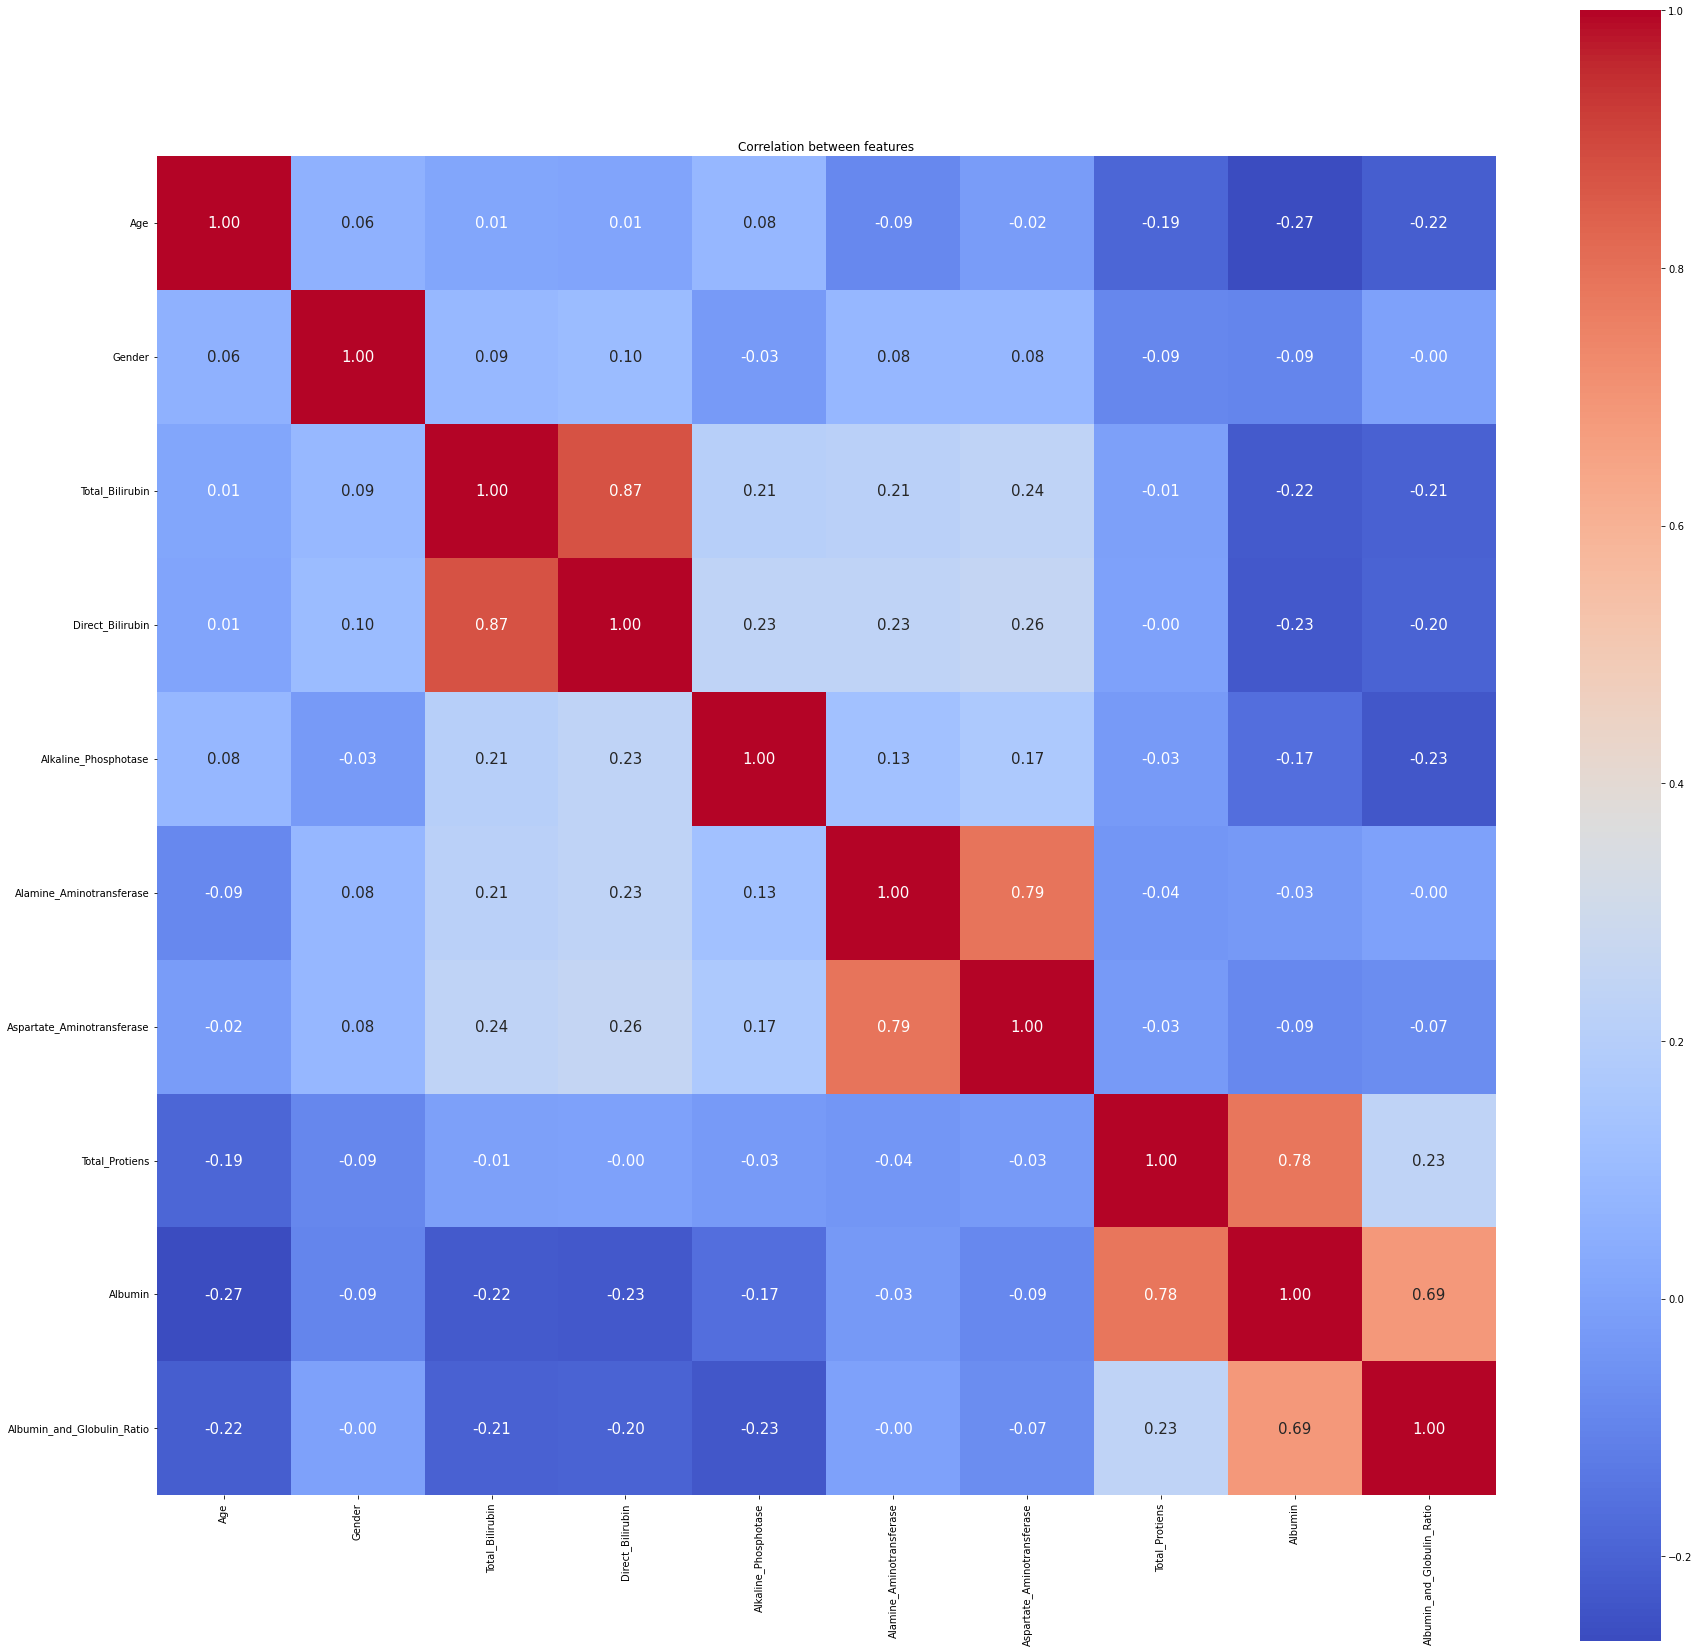

In [231]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [232]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

# Machine Learning

In [233]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 10)
(408,)
(175, 10)
(175,)


In [235]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (408, 10) (408,)
Test Set:  (175, 10) (175,)


In [236]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [237]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [238]:

confusion_matrix(y_test, model.predict(X_test))

array([[99, 25],
       [32, 19]])

In [239]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100,2)}")

Accuracy is 67.43


## IBM-Deployment

In [240]:
!pip install -U ibm-watson-machine-learning

In [241]:
from ibm_watson_machine_learning import APIClient
import json


## Authenticate and Set Space


In [242]:
wml_credentials = {
    "apikey":"Ajx7BZ64A-kNZlcGlAyn4Dr-RYfooJomuf0V44dWXDDZ",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [243]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------------------  ------------------------
ID                                    NAME                             CREATED
3fcb1caa-9ea3-4d38-a7a3-c03f490873c5  Liver_disease_prediction_deploy  2022-11-15T14:25:45.936Z
------------------------------------  -------------------------------  ------------------------


In [244]:
SPACE_ID= "3fcb1caa-9ea3-4d38-a7a3-c03f490873c5"

In [ ]:
wml_client.set.default_space(SPACE_ID)

In [ ]:
wml_client.software_specifications.list(500)

## Save and Deploy the model

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
MODEL_NAME = 'Liver Disease Prediction'
DEPLOYMENT_NAME = 'Liver_disease_prediction_deploy'
DEMO_MODEL = gaussian

In [ ]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [ ]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [ ]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [ ]:
model_details

In [ ]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

In [ ]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [ ]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)